In [8]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [9]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('1', '1', '0', '0', '0', '1', '1', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ A □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [10]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *

cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance=0.9,
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=200
                    )


In [11]:

df = avg_experiment(maze=maze,
                         cfg=cfg,
                         number_of_tests=3,
                         explore_trials=0,
                         exploit_trials=2500,
                         pre_generate=True)


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.615795999999989, 'numerosity': 1800, 'population': 1206, 'average_specificity': 2.2794444444444446, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 6, 'reward': 1129.2076241010484, 'perf_time': 0.10484950000000026, 'numerosity': 1800, 'population': 1368, 'average_specificity': 9.976666666666667, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 2, 'reward': 1664.7982218802304, 'perf_time': 0.031416800000044987, 'numerosity': 1800, 'population': 1425, 'average_specificity': 13.872777777777777, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 750, 'steps_in_trial': 5, 'reward': 1180.6411262422744, 'perf_time': 0.05660550000004605, 'numerosity': 1800, 'population': 1454, 'average_specificity': 14.497777777777777, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 5, 'reward': 1196.8327617638906, 'per

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.1664925999999696, 'numerosity': 1800, 'population': 1175, 'average_specificity': 2.236111111111111, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 23, 'reward': 1000.5154234374991, 'perf_time': 0.2903112000000192, 'numerosity': 1800, 'population': 1305, 'average_specificity': 7.065, 'fraction_accuracy': 0.06944444444444445}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 9, 'reward': 1049.8776464610858, 'perf_time': 0.13190950000000612, 'numerosity': 1800, 'population': 1429, 'average_specificity': 12.384444444444444, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 750, 'steps_in_trial': 2, 'reward': 1504.1000020347997, 'perf_time': 0.021230500000001484, 'numerosity': 1800, 'population': 1472, 'average_specificity': 13.886111111111111, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 3, 'reward': 1357.9115795533346, 

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 1.3072147999998833, 'numerosity': 1800, 'population': 1182, 'average_specificity': 2.2305555555555556, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 13, 'reward': 1012.7643774523818, 'perf_time': 0.2007926999999654, 'numerosity': 1800, 'population': 1335, 'average_specificity': 8.28, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 6, 'reward': 1136.729178232851, 'perf_time': 0.09834849999992912, 'numerosity': 1800, 'population': 1427, 'average_specificity': 11.042222222222222, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 750, 'steps_in_trial': 1, 'reward': 1716.0951078545058, 'perf_time': 0.012460799999871597, 'numerosity': 1800, 'population': 1459, 'average_specificity': 12.099444444444444, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 23, 'reward': 1000.3792775415797, 'perf_time': 0.3

In [12]:
display(df)

,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,100.000000,0.000000,1.363168,1800.0,1187.666667,2.248704,0.000000
50,71.333333,336.217128,1.010822,1800.0,1233.333333,4.487407,0.000000
100,3.666667,1510.951636,0.034092,1800.0,1252.666667,5.220370,0.000000
150,5.000000,1255.752454,0.078218,1800.0,1276.000000,6.278519,0.000000
200,6.333333,1197.275755,0.085625,1800.0,1315.333333,8.036111,0.000000
250,14.000000,1047.495808,0.198651,1800.0,1336.000000,8.440556,0.023148
300,33.000000,1142.880809,0.418496,1800.0,1363.333333,9.887222,0.000000
350,3.333333,1396.323235,0.062146,1800.0,1380.333333,10.446111,0.000000
400,4.333333,1318.638491,0.091554,1800.0,1401.666667,10.607778,0.000000


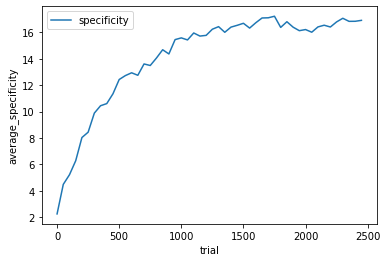

In [13]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


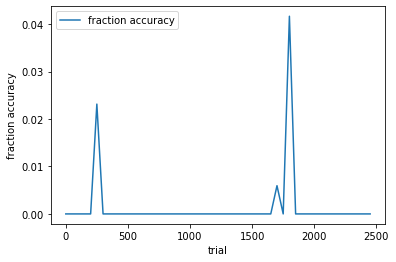

In [14]:
ax = df['fraction_accuracy'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

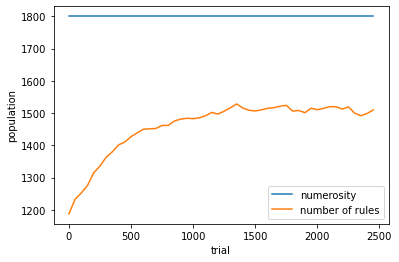

In [15]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

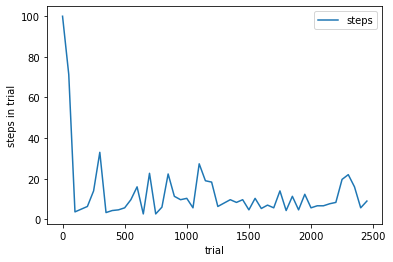

In [16]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])

In [18]:
print(sum(df['steps_in_trial'])/3)

221.3333333333333
